In [ ]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from google.colab import drive
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# import spacy
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Data Preprocessing**

In [ ]:
# data = pd.read_csv('https://drive.google.com/file/d/17dGFQwjIviABHOh_RobPqrWfr15YpuNK/view?usp=sharing')
data = pd.read_csv('https://drive.google.com/uc?export=download&id=17dGFQwjIviABHOh_RobPqrWfr15YpuNK')
# https://drive.google.com/uc?export=download&id=FILE_ID
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
data['fraudulent'].value_counts()

,count
fraudulent,
0,17014
1,866


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
# # Simple Random Sampling
# fraudulent_0 = data[data['fraudulent'] == 0]
# fraudulent_1 = data[data['fraudulent'] == 1]

# sample_0 = fraudulent_0.sample(n=866, random_state=42)

# data = pd.concat([sample_0, fraudulent_1])

## Metode Sampling

In [ ]:
# Stratified Sampling

fraudulent_1 = data[data['fraudulent'] == 1]
fraudulent_0 = data[data['fraudulent'] == 0]

sample_fraudulent_1 = fraudulent_1.sample(n=866, random_state=42)
sample_fraudulent_0 = fraudulent_0.sample(n=866, random_state=42)

data_stratified = pd.concat([sample_fraudulent_1, sample_fraudulent_0])

data_stratified = data_stratified.sample(frac=1, random_state=42).reset_index(drop=True)

print(data_stratified['fraudulent'].value_counts())

data = data_stratified.copy()

fraudulent
1    866
0    866
Name: count, dtype: int64


## Feature Selection

In [ ]:
data.isnull().sum()

,0
job_id,0
title,0
location,40
department,1102
salary_range,1382
company_profile,718
description,1
requirements,276
benefits,702
telecommuting,0


In [ ]:
data['fraudulent'].value_counts()

,count
fraudulent,
1,866
0,866


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               1732 non-null   int64 
 1   title                1732 non-null   object
 2   location             1692 non-null   object
 3   department           630 non-null    object
 4   salary_range         350 non-null    object
 5   company_profile      1014 non-null   object
 6   description          1731 non-null   object
 7   requirements         1456 non-null   object
 8   benefits             1030 non-null   object
 9   telecommuting        1732 non-null   int64 
 10  has_company_logo     1732 non-null   int64 
 11  has_questions        1732 non-null   int64 
 12  employment_type      1331 non-null   object
 13  required_experience  961 non-null    object
 14  required_education   895 non-null    object
 15  industry             1225 non-null   object
 16  functi

<BarContainer object of 2 artists>

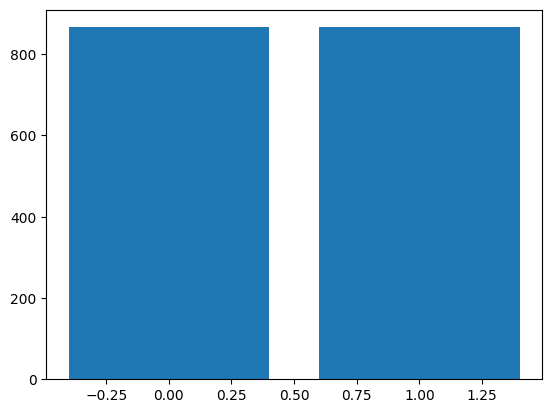

In [ ]:
distribution = data['fraudulent'].value_counts()
plt.bar(distribution.index,distribution.values)

0: real job \\
1: fake job

In [ ]:
data.isnull().sum()

,0
job_id,0
title,0
location,40
department,1102
salary_range,1382
company_profile,718
description,1
requirements,276
benefits,702
telecommuting,0


In [ ]:
# For text columns, replace missing values with an empty string
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits',
                'industry','location','function','employment_type']
data[text_columns] = data[text_columns].fillna(' ')

In [ ]:
# Fungsi untuk menghitung mean dari TF-IDF tiap sel
def calculate_tfidf_mean(column):
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(column).toarray()
    tfidf_mean = tfidf_matrix.mean(axis=1)
    return tfidf_mean

# Dataframe baru untuk menyimpan hasil
tfidf_mean_df = pd.DataFrame()
# Menghitung mean TF-IDF untuk setiap kolom dan menyimpan hasilnya ke dataframe baru
for i in text_columns:
    tfidf_mean_df[i + '_numeric'] = calculate_tfidf_mean(data[i])

# # Menghitung matriks korelasi
correlation_matrix = tfidf_mean_df.corr()
correlation_matrix['function_numeric']

,function_numeric
title_numeric,-0.141855
company_profile_numeric,0.255130
description_numeric,0.107967
requirements_numeric,0.297904
benefits_numeric,0.183856
industry_numeric,0.561536
location_numeric,0.187939
function_numeric,1.000000
employment_type_numeric,0.507979


In [ ]:
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1663,administrative assistance,"US, NY, Moravia",admin,13-20,,This position is for an Administrative Assista...,Must be proficient with OutlookSome knowledge ...,"Benefit includes: health and welfare coverage,...",0,0,0,Other,Entry level,High School or equivalent,Accounting,Administrative,1
1,10791,HR Generalist,"US, TX, Austin",NaN,50000-60000,NFP is a leader in the delivery of benefits so...,Summary: The HR Generalist supports external c...,"Knowledge, Skills and Abilities Superior custo...",NFP offers a comprehensive benefits package to...,0,1,1,Full-time,Associate,Bachelor's Degree,Human Resources,Human Resources,0
2,17794,Project Controls Technician,"US, CA, Bakersfield",Oil & Energy,NaN,...,Essential Duties and Responsibilities:* Assist...,General Qualifications:Excellent communication...,"* Clean, safe, and enjoyable working environme...",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Accounting/Auditing,1
3,1841,Validation engineer/ QA,"US, OH, Dayton",NaN,70000-80000,,Location spread for Validation engineerExperie...,§ Knowledge of national and international reg...,,0,1,0,Full-time,Mid-Senior level,Master's Degree,,,0
4,6065,Mail Processing Associate - General Clerk 1,"US, KY, London",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",We are currently seeking a General Clerk I. Th...,Required Qualifications:Minimum of 1 year cust...,,0,1,0,Full-time,Entry level,High School or equivalent,Consumer Services,Customer Service,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,5681,Volunteer Relationship Manager,"GB, LND, Kingston",NaN,34000-35000,VSO brings people together to fight poverty by...,This exciting new role will play a pivotal par...,The successful candidate will have experience ...,,0,0,0,Full-time,Mid-Senior level,NaN,Nonprofit Organization Management,Marketing,0
1728,12483,VAN SALES REPRESENTATIVE,"NG, ,",NaN,NaN,The MacTay Group is a leading consulting compa...,MacTay Consulting is recruiting on behalf of o...,Education and RequirementsMinimum qualificatio...,,0,1,1,Full-time,Entry level,High School or equivalent,Food & Beverages,Sales,0
1729,2369,Director of Product Marketing for Advertisers,"US, CA, San Mateo",Information Technology,NaN,Aptitude Staffing Solutions has redesigned the...,Seeking a Director of Product Marketing to pos...,Skills and Requirements:BS/BA or equivalent fr...,,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Marketing and Advertising,Information Technology,1
1730,4719,Jr. Account Executive,"US, CA, Irvine",Sales,30000-36000,HappyFox is a young startup that is all about ...,HappyFox is all about bringing the happiness q...,Excellent clarity in communicationConsultative...,Competitive payCasual and high energy work env...,0,1,1,Full-time,Entry level,Bachelor's Degree,Information Technology and Services,Sales,0


In [ ]:
from scipy.stats import pointbiserialr, pearsonr
for i in list(tfidf_mean_df.columns):
  point_biserial_corr, p_value = pointbiserialr(tfidf_mean_df[i], data['fraudulent'])
  print('Korelasi Point-Biserial antara '+i+' dan fraudulent: ', point_biserial_corr)

Korelasi Point-Biserial antara title_numeric dan fraudulent:  0.1103545402902137
Korelasi Point-Biserial antara company_profile_numeric dan fraudulent:  -0.4908567953069869
Korelasi Point-Biserial antara description_numeric dan fraudulent:  -0.0884748130717134
Korelasi Point-Biserial antara requirements_numeric dan fraudulent:  -0.17093372807284074
Korelasi Point-Biserial antara benefits_numeric dan fraudulent:  -0.013647594171647428
Korelasi Point-Biserial antara industry_numeric dan fraudulent:  -0.05807898995742531
Korelasi Point-Biserial antara location_numeric dan fraudulent:  -0.03562053601951615
Korelasi Point-Biserial antara function_numeric dan fraudulent:  -0.054516173312646875
Korelasi Point-Biserial antara employment_type_numeric dan fraudulent:  -0.09958727492335911


In [ ]:
selectedfeatures = ['title', 'company_profile', 'description', 'requirements', 'benefits', 'industry', 'employment_type', 'location']
data['merge_text'] = ''
for i in selectedfeatures:
  data['merge_text'] = data['merge_text']+data[i]

data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,merge_text
0,1663,administrative assistance,"US, NY, Moravia",admin,13-20,,This position is for an Administrative Assista...,Must be proficient with OutlookSome knowledge ...,"Benefit includes: health and welfare coverage,...",0,0,0,Other,Entry level,High School or equivalent,Accounting,Administrative,1,administrative assistance This position is fo...
1,10791,HR Generalist,"US, TX, Austin",NaN,50000-60000,NFP is a leader in the delivery of benefits so...,Summary: The HR Generalist supports external c...,"Knowledge, Skills and Abilities Superior custo...",NFP offers a comprehensive benefits package to...,0,1,1,Full-time,Associate,Bachelor's Degree,Human Resources,Human Resources,0,HR GeneralistNFP is a leader in the delivery o...
2,17794,Project Controls Technician,"US, CA, Bakersfield",Oil & Energy,NaN,...,Essential Duties and Responsibilities:* Assist...,General Qualifications:Excellent communication...,"* Clean, safe, and enjoyable working environme...",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Accounting/Auditing,1,Project Controls Technician ...
3,1841,Validation engineer/ QA,"US, OH, Dayton",NaN,70000-80000,,Location spread for Validation engineerExperie...,§ Knowledge of national and international reg...,,0,1,0,Full-time,Mid-Senior level,Master's Degree,,,0,Validation engineer/ QA Location spread for Va...
4,6065,Mail Processing Associate - General Clerk 1,"US, KY, London",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",We are currently seeking a General Clerk I. Th...,Required Qualifications:Minimum of 1 year cust...,,0,1,0,Full-time,Entry level,High School or equivalent,Consumer Services,Customer Service,0,Mail Processing Associate - General Clerk 1 No...


In [ ]:
data['fraudulent'] = data['fraudulent'].replace({0: 'real', 1: 'fake'})

In [ ]:
data['fraudulent'].value_counts()

,count
fraudulent,
fake,866
real,866


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
port_stem = PorterStemmer()

In [ ]:
pattern = re.compile('[^a-zA-Z]')
def stemming(content):
    stemmed_content = pattern.sub(' ', content).lower().split()
    # stemmed_content = stemmed_content.lower()
    # stemmed_content = stemmed_content.split()
    stopwords_set = set(stopwords.words('english'))
    stemmed_content = ' '.join(word for word in stemmed_content if word not in stopwords_set)
    return stemmed_content

In [ ]:
data['merge_text'] = data['merge_text'].apply(stemming)

In [ ]:
X = data['merge_text'].values
Y = data['fraudulent'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
len(y_train)

1212

In [ ]:
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [ ]:
vectorizer_limited = TfidfVectorizer(max_features=7000)
X_train_transformed_limited = vectorizer_limited.fit_transform(X_train)
X_test_transformed_limited = vectorizer_limited.transform(X_test)

In [ ]:
X_train_transformed.shape[1]

20057

In [ ]:
X_train_transformed_limited.shape

(1212, 7000)

In [ ]:
count = CountVectorizer()
Xcount_train_transformed = count.fit_transform(X_train)
Xcount_test_transformed = count.transform(X_test)

In [ ]:
count_ngr = CountVectorizer(ngram_range=(2,2))
Xcount_train_transformed_ngr = count_ngr.fit_transform(X_train)
Xcount_test_transformed_ngr = count_ngr.transform(X_test)

## Naive Bayes Library

In [ ]:
nb_classifier = MultinomialNB()

In [ ]:
# Default tf idf
# Train the model
nb_classifier.fit(X_train_transformed, y_train)

# Predict
y_pred = nb_classifier.predict(X_test_transformed)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.8961538461538462
Classification Report:
              precision    recall  f1-score   support

        fake       0.86      0.93      0.90       250
        real       0.93      0.86      0.90       270

    accuracy                           0.90       520
   macro avg       0.90      0.90      0.90       520
weighted avg       0.90      0.90      0.90       520



In [ ]:
# Limited tf idf
# Train the model
max = 0.5

for i in range(5,100,5):
  vectorizer_limited = TfidfVectorizer(max_features=int(i/100*X_train_transformed.shape[1]//1))
  X_train_transformed_limited = vectorizer_limited.fit_transform(X_train)
  X_test_transformed_limited = vectorizer_limited.transform(X_test)

  nb_classifier.fit(X_train_transformed_limited, y_train)

  # Predict
  y_pred = nb_classifier.predict(X_test_transformed_limited)
  report = classification_report(y_test, y_pred, output_dict=True)
  if report['fake']['recall'] > max:
    max = report['fake']['recall']
    features = i/100*X_train_transformed.shape[1]
    pred_opt = y_pred
    maxf = int(i/100*X_train_transformed.shape[1]//1)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, pred_opt)}")
print(f"Classification Report:\n{classification_report(y_test, pred_opt)}")
print(maxf)

Accuracy: 0.9019230769230769
Classification Report:
              precision    recall  f1-score   support

        fake       0.87      0.93      0.90       250
        real       0.93      0.87      0.90       270

    accuracy                           0.90       520
   macro avg       0.90      0.90      0.90       520
weighted avg       0.90      0.90      0.90       520

13037


In [ ]:
print(max)

0.932


In [ ]:
# Pakai bag of words (count default)
# Train the model
nb_classifier.fit(Xcount_train_transformed, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(Xcount_test_transformed)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9019230769230769
Classification Report:
              precision    recall  f1-score   support

        fake       0.89      0.91      0.90       250
        real       0.92      0.89      0.90       270

    accuracy                           0.90       520
   macro avg       0.90      0.90      0.90       520
weighted avg       0.90      0.90      0.90       520



In [ ]:
# Pakai bag of words (n gram)
# Train the model
nb_classifier.fit(Xcount_train_transformed_ngr, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(Xcount_test_transformed_ngr)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9461538461538461
Classification Report:
              precision    recall  f1-score   support

        fake       0.94      0.95      0.94       250
        real       0.95      0.94      0.95       270

    accuracy                           0.95       520
   macro avg       0.95      0.95      0.95       520
weighted avg       0.95      0.95      0.95       520



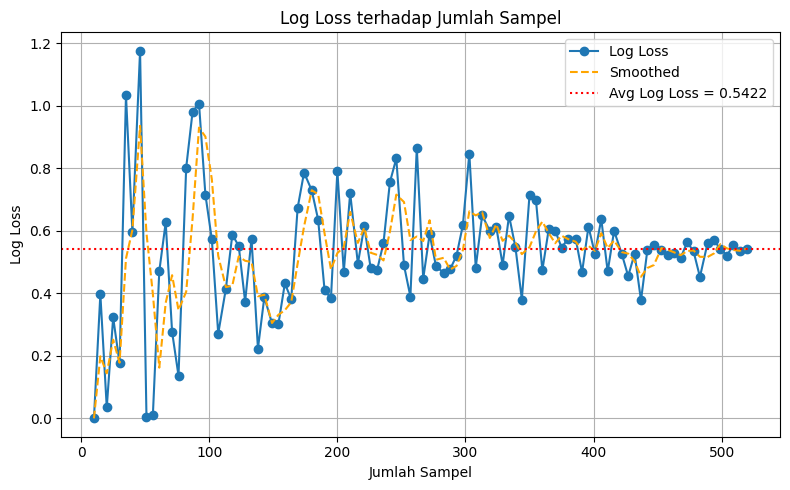

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import log_loss

# prob berdasarkan NB
y_pred_proba = nb_classifier.predict_proba(Xcount_test_transformed_ngr)

# log loss
loss_values = []
sample_sizes = np.linspace(10, len(y_test), num=100, dtype=int)

for size in sample_sizes:
    # ambil indeks acak sebanyak 'size'
    random_indices = np.random.choice(len(y_test), size=size, replace=False)

    # ambil subset data berdasarkan indeks tersebut
    y_sample = y_test.iloc[random_indices] if hasattr(y_test, 'iloc') else y_test[random_indices]
    y_pred_sample = y_pred_proba[random_indices]

    # hitung log loss
    loss = log_loss(y_sample, y_pred_sample)
    loss_values.append(loss)

# smoothed log loss
smoothed_loss = pd.Series(loss_values).rolling(window=3, min_periods=1).mean()

# rata-rata log loss keseluruhan
avg_loss = log_loss(y_test, y_pred_proba)

# plot log loss
plt.figure(figsize=(8,5))
plt.plot(sample_sizes, loss_values, marker='o', linestyle='-', label="Log Loss")
plt.plot(sample_sizes, smoothed_loss, linestyle='--', color='orange', label="Smoothed")
plt.axhline(avg_loss, color='red', linestyle=':', label=f"Avg Log Loss = {avg_loss:.4f}")
plt.xlabel("Jumlah Sampel")
plt.ylabel("Log Loss")
plt.title("Log Loss terhadap Jumlah Sampel")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


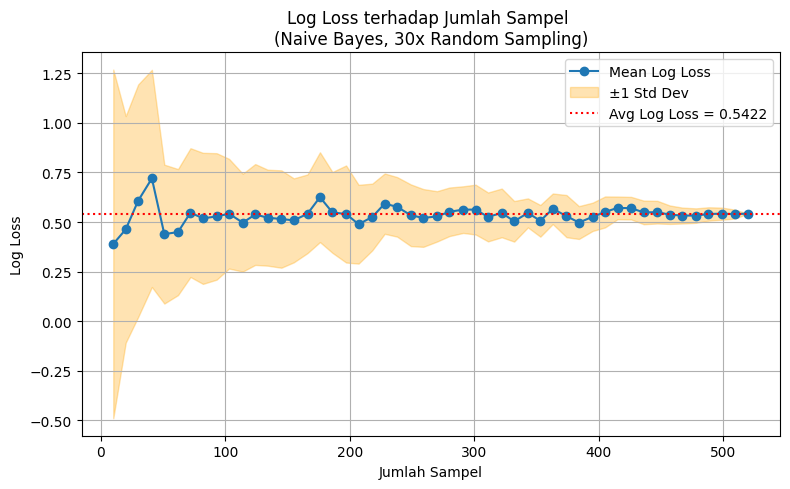

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import log_loss

# prob
y_pred_proba = nb_classifier.predict_proba(Xcount_test_transformed_ngr)

# parameter
sample_sizes = np.linspace(10, len(y_test), num=50, dtype=int)
n_iterations = 30  # jumlah pengulangan random sampling per sample size
np.random.seed(42)  # supaya hasilnya konsisten

mean_losses = []
std_losses = []

for size in sample_sizes:
    losses = []
    for _ in range(n_iterations):
        random_indices = np.random.choice(len(y_test), size=size, replace=False)
        y_sample = y_test.iloc[random_indices] if hasattr(y_test, 'iloc') else y_test[random_indices]
        y_pred_sample = y_pred_proba[random_indices]

        loss = log_loss(y_sample, y_pred_sample)
        losses.append(loss)

    mean_losses.append(np.mean(losses))
    std_losses.append(np.std(losses))

# rata-rata log loss keseluruhan
avg_loss = log_loss(y_test, y_pred_proba)

# plot log loss
plt.figure(figsize=(8,5))
plt.plot(sample_sizes, mean_losses, marker='o', linestyle='-', label="Mean Log Loss")
plt.fill_between(sample_sizes,
                 np.array(mean_losses) - np.array(std_losses),
                 np.array(mean_losses) + np.array(std_losses),
                 color='orange', alpha=0.3, label="±1 Std Dev")

plt.axhline(avg_loss, color='red', linestyle=':', label=f"Avg Log Loss = {avg_loss:.4f}")
plt.xlabel("Jumlah Sampel")
plt.ylabel("Log Loss")
plt.title(f"Log Loss terhadap Jumlah Sampel \n(Naive Bayes, {n_iterations}x Random Sampling)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score
import numpy as np

#Mengambil K Fold secara acak
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Prediksi
y_train_pred = nb_classifier.predict(Xcount_train_transformed_ngr)
y_test_pred = nb_classifier.predict(Xcount_test_transformed_ngr)

#Evaluasi
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

#Cross val dengan recall
cv_scores = []

for train_idx, val_idx in cv.split(Xcount_train_transformed_ngr, y_train):
    X_fold_train, X_fold_val = Xcount_train_transformed_ngr[train_idx], Xcount_train_transformed_ngr[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

    nb_classifier.fit(X_fold_train, y_fold_train)

    y_fold_pred = nb_classifier.predict(X_fold_val)

    recall = recall_score(y_fold_val, y_fold_pred, average="macro", zero_division=1)
    cv_scores.append(recall)

cv_scores = np.array(cv_scores)

#Hitung mean dan stdev
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

#Perhitungan threshold untuk deteksi overfit
threshold = mean_cv_score - 2 * std_cv_score #Asumsi normal

print(f"Cross-validation Recall Scores: {cv_scores}")
print(f"Cross-validation Mean Recall: {mean_cv_score:.4f}")
print(f"Cross-validation Recall Std Dev: {std_cv_score:.4f}")
print(f"Threshold for Overfitting Detection: {threshold:.4f}")

#Cek overfit
if test_acc < threshold:
    print("Potential overfitting detected!")
else:
    print("Model generalizes well.")


Training Accuracy: 0.9983
Testing Accuracy: 0.9462
Cross-validation Recall Scores: [0.92926829 0.84975603 0.86175446 0.87883446 0.84604086]
Cross-validation Mean Recall: 0.8731
Cross-validation Recall Std Dev: 0.0303
Threshold for Overfitting Detection: 0.8125
Model generalizes well.


In [ ]:
#Hyperparameter Tuning
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

nb_classifier = MultinomialNB()

param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 5, 10]}

grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xcount_train_transformed_ngr, y_train)

best_nb = grid_search.best_estimator_

y_pred = best_nb.predict(Xcount_test_transformed_ngr)

print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Best Alpha: 0.01
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

        fake       0.96      0.93      0.95       250
        real       0.94      0.97      0.95       270

    accuracy                           0.95       520
   macro avg       0.95      0.95      0.95       520
weighted avg       0.95      0.95      0.95       520



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score
import numpy as np

#Membuat K Fold data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Prediksi
y_train_pred = best_nb.predict(Xcount_train_transformed_ngr)
y_test_pred = best_nb.predict(Xcount_test_transformed_ngr)

#Evaluasi
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

#Cross validation recall
cv_scores = []

for train_idx, val_idx in cv.split(Xcount_train_transformed_ngr, y_train):
    X_fold_train, X_fold_val = Xcount_train_transformed_ngr[train_idx], Xcount_train_transformed_ngr[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

    best_nb.fit(X_fold_train, y_fold_train)

    y_fold_pred = best_nb.predict(X_fold_val)

    recall = recall_score(y_fold_val, y_fold_pred, average="macro", zero_division=1)
    cv_scores.append(recall)


cv_scores = np.array(cv_scores)

#Hitung mean dan standar deviasi
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

#Threshold untuk deteksi overfit
threshold = mean_cv_score - 2 * std_cv_score #Normal assumption

print(f"Cross-validation Recall Scores: {cv_scores}")
print(f"Cross-validation Mean Recall: {mean_cv_score:.4f}")
print(f"Cross-validation Recall Std Dev: {std_cv_score:.4f}")
print(f"Threshold for Overfitting Detection: {threshold:.4f}")

#Cek overfit
if test_acc < threshold:
    print("Potential overfitting detected!")
else:
    print("Model generalizes well.")


Training Accuracy: 1.0000
Testing Accuracy: 0.9500
Cross-validation Recall Scores: [0.94634146 0.88404717 0.8789711  0.90472774 0.86366742]
Cross-validation Mean Recall: 0.8956
Cross-validation Recall Std Dev: 0.0286
Threshold for Overfitting Detection: 0.8384
Model generalizes well.


## Logistic Regression Library

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR_classifier = LogisticRegression(max_iter=1000)

In [ ]:
# Logistic Regression
# Train
LR_classifier.fit(X_train_transformed, y_train)

# Prediksi
y_pred = LR_classifier.predict(X_test_transformed)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9076923076923077
Classification Report:
              precision    recall  f1-score   support

        fake       0.91      0.90      0.90       250
        real       0.91      0.91      0.91       270

    accuracy                           0.91       520
   macro avg       0.91      0.91      0.91       520
weighted avg       0.91      0.91      0.91       520



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

Accuracy: 0.9134615384615384
Classification Report:
              precision    recall  f1-score   support

        fake       0.91      0.91      0.91       250
        real       0.92      0.92      0.92       270

    accuracy                           0.91       520
   macro avg       0.91      0.91      0.91       520
weighted avg       0.91      0.91      0.91       520



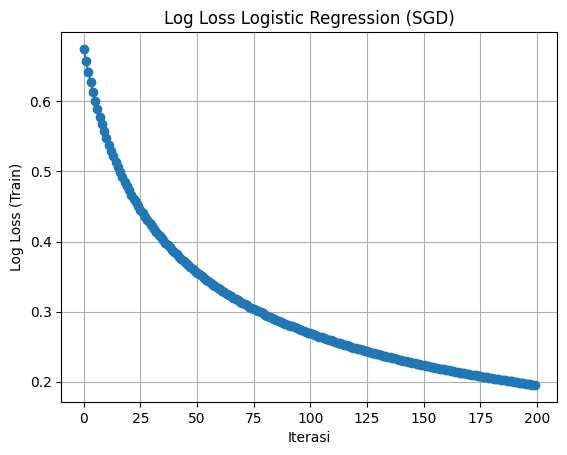

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss
import matplotlib.pyplot as plt

# List nilai log loss
log_losses_sgd = []

# Logistic Regression pakai SGD
SGD_LR_classifier = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=1, warm_start=True, random_state=42)

# Iterasi training
for i in range(200):
    SGD_LR_classifier.fit(X_train_transformed, y_train)
    y_train_proba = SGD_LR_classifier.predict_proba(X_train_transformed)
    loss = log_loss(y_train, y_train_proba)
    log_losses_sgd.append(loss)

# Predict
y_pred_sgd = SGD_LR_classifier.predict(X_test_transformed)

print(f"Accuracy: {accuracy_score(y_test, y_pred_sgd)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_sgd)}")

# Plot
plt.plot(log_losses_sgd, marker='o')
plt.xlabel('Iterasi')
plt.ylabel('Log Loss (Train)')
plt.title('Log Loss Logistic Regression (SGD)')
plt.grid(True)
plt.show()


In [ ]:
# TF IDF Limited
# Train
LR_classifier.fit(X_train_transformed_limited, y_train)

# Predict
max = 0.5

for i in range(5,100,5):
  vectorizer_limited = TfidfVectorizer(max_features=int(i/100*X_train_transformed.shape[1]//1))
  X_train_transformed_limited = vectorizer_limited.fit_transform(X_train)
  X_test_transformed_limited = vectorizer_limited.transform(X_test)

  LR_classifier.fit(X_train_transformed_limited, y_train)

  # Predict test
  y_pred = LR_classifier.predict(X_test_transformed_limited)
  report = classification_report(y_test, y_pred, output_dict=True)
  if report['fake']['recall'] > max:
    max = report['fake']['recall']
    features = i/100*X_train_transformed.shape[1]
    pred_opt = y_pred
    maxf = i/100

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, pred_opt)}")
print(f"Classification Report:\n{classification_report(y_test, pred_opt)}")
print(maxf)
y_pred = LR_classifier.predict(X_test_transformed_limited)

Accuracy: 0.9019230769230769
Classification Report:
              precision    recall  f1-score   support

        fake       0.88      0.92      0.90       250
        real       0.92      0.89      0.90       270

    accuracy                           0.90       520
   macro avg       0.90      0.90      0.90       520
weighted avg       0.90      0.90      0.90       520

0.05


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

Accuracy: 0.9115384615384615
Classification Report:
              precision    recall  f1-score   support

        fake       0.91      0.90      0.91       250
        real       0.91      0.92      0.92       270

    accuracy                           0.91       520
   macro avg       0.91      0.91      0.91       520
weighted avg       0.91      0.91      0.91       520

Proporsi Fitur Terbaik: 50% (10028 fitur)


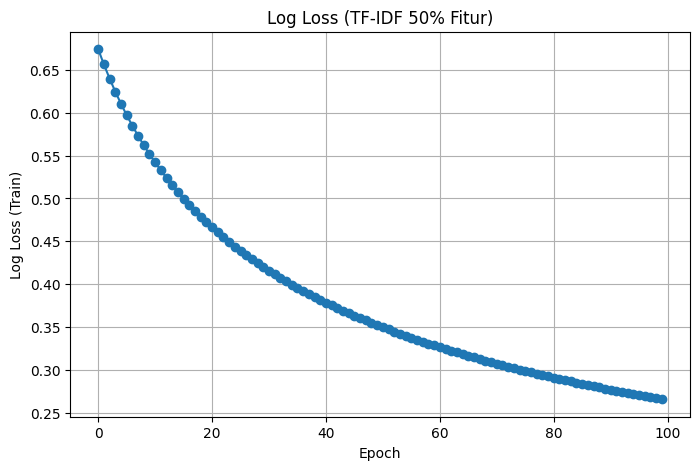

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt

# Parameter
max_recall = 0.5
maxf = 0
features = 0
pred_opt = None
optimal_log_losses = []

# Pembatasan fitur (looping buat beberapa batasan)
for i in range(5, 100, 5):
    max_features_current = int(i/100 * X_train_transformed.shape[1])
    vectorizer_limited = TfidfVectorizer(max_features=max_features_current)
    X_train_transformed_limited = vectorizer_limited.fit_transform(X_train)
    X_test_transformed_limited = vectorizer_limited.transform(X_test)

    SGD_LR_classifier = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=1, warm_start=True, random_state=42)

    temp_log_losses = []

    for epoch in range(100):
        SGD_LR_classifier.fit(X_train_transformed_limited, y_train)

        y_train_proba = SGD_LR_classifier.predict_proba(X_train_transformed_limited)

        loss = log_loss(y_train, y_train_proba)
        temp_log_losses.append(loss)

    y_pred = SGD_LR_classifier.predict(X_test_transformed_limited)
    report = classification_report(y_test, y_pred, output_dict=True)

    if report['fake']['recall'] > max_recall:
        max_recall = report['fake']['recall']
        features = max_features_current
        pred_opt = y_pred
        maxf = i/100
        optimal_log_losses = temp_log_losses

# Hasil
print(f"Accuracy: {accuracy_score(y_test, pred_opt)}")
print(f"Classification Report:\n{classification_report(y_test, pred_opt)}")
print(f"Proporsi Fitur Terbaik: {maxf*100:.0f}% ({features} fitur)")

# Evaluasi
plt.figure(figsize=(8, 5))
plt.plot(optimal_log_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Log Loss (Train)')
plt.title(f'Log Loss (TF-IDF {maxf*100:.0f}% Fitur)')
plt.grid(True)
plt.show()


In [ ]:
# Count Vectorizer Default
# Train
LR_classifier.fit(Xcount_train_transformed, y_train)

# Predict
y_pred = LR_classifier.predict(Xcount_test_transformed)

# Print
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9134615384615384
Classification Report:
              precision    recall  f1-score   support

        fake       0.88      0.94      0.91       250
        real       0.94      0.89      0.91       270

    accuracy                           0.91       520
   macro avg       0.91      0.91      0.91       520
weighted avg       0.92      0.91      0.91       520



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

Accuracy: 0.9076923076923077
Classification Report:
              precision    recall  f1-score   support

        fake       0.89      0.92      0.91       250
        real       0.93      0.89      0.91       270

    accuracy                           0.91       520
   macro avg       0.91      0.91      0.91       520
weighted avg       0.91      0.91      0.91       520



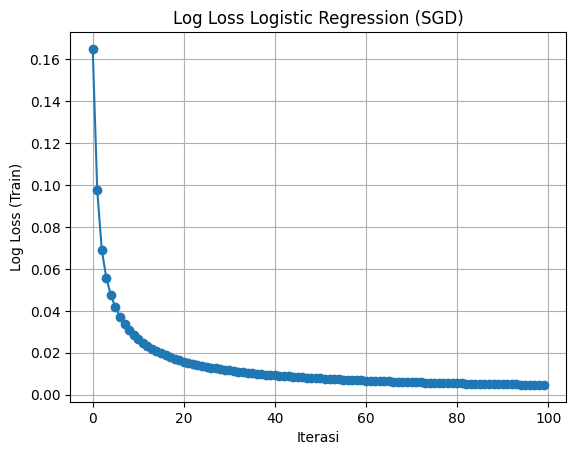

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss
import matplotlib.pyplot as plt

# Siapkan list untuk simpan log loss per iterasi
log_losses_sgd = []
SGD_LR_classifier = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=1, warm_start=True, random_state=42)

# Train
for i in range(100):
    SGD_LR_classifier.fit(Xcount_train_transformed, y_train)
    y_train_proba = SGD_LR_classifier.predict_proba(Xcount_train_transformed)
    loss = log_loss(y_train, y_train_proba)
    log_losses_sgd.append(loss)

y_pred_sgd = SGD_LR_classifier.predict(Xcount_test_transformed)

# Evaluasi
print(f"Accuracy: {accuracy_score(y_test, y_pred_sgd)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_sgd)}")

# Plot
plt.plot(log_losses_sgd, marker='o')
plt.xlabel('Iterasi')
plt.ylabel('Log Loss (Train)')
plt.title('Log Loss Logistic Regression (SGD)')
plt.grid(True)
plt.show()


In [ ]:
# Count Vectorizer n gram
# Train
LR_classifier.fit(Xcount_train_transformed_ngr, y_train)

# Predict
y_pred = LR_classifier.predict(Xcount_test_transformed_ngr)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9192307692307692
Classification Report:
              precision    recall  f1-score   support

        fake       0.88      0.96      0.92       250
        real       0.96      0.88      0.92       270

    accuracy                           0.92       520
   macro avg       0.92      0.92      0.92       520
weighted avg       0.92      0.92      0.92       520



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

Accuracy: 0.9403846153846154
Classification Report:
              precision    recall  f1-score   support

        fake       0.93      0.95      0.94       250
        real       0.95      0.93      0.94       270

    accuracy                           0.94       520
   macro avg       0.94      0.94      0.94       520
weighted avg       0.94      0.94      0.94       520



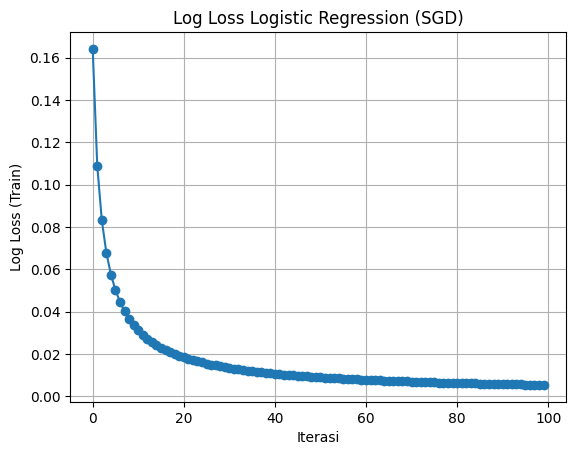

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss
import matplotlib.pyplot as plt

# List log loss
log_losses_sgd = []

# Logistic Regression pakai SGD
SGD_LR_classifier = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=1, warm_start=True, random_state=42)

# Iterasi training manual
for i in range(100):
    SGD_LR_classifier.fit(Xcount_train_transformed_ngr, y_train)
    y_train_proba = SGD_LR_classifier.predict_proba(Xcount_train_transformed_ngr)
    loss = log_loss(y_train, y_train_proba)
    log_losses_sgd.append(loss)

# Prediksi dan evaluasi
y_pred_sgd = SGD_LR_classifier.predict(Xcount_test_transformed_ngr)

print(f"Accuracy: {accuracy_score(y_test, y_pred_sgd)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_sgd)}")

# Plot
plt.plot(log_losses_sgd, marker='o')
plt.xlabel('Iterasi')
plt.ylabel('Log Loss (Train)')
plt.title('Log Loss Logistic Regression (SGD)')
plt.grid(True)
plt.show()


In [ ]:
# Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from scipy.stats import uniform

sgd = SGDClassifier(loss='log_loss', random_state=42)

# Parameter yang digunakan
param_dist = {
    'alpha': uniform(0.0001, 0.01),
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': uniform(0.001, 0.1),
    'penalty': ['l2', 'l1', 'elasticnet']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    sgd,
    param_distributions=param_dist,
    n_iter=30,               # jumlah kombinasi random yang dicoba
    scoring='accuracy',      # metrik utama (bisa diganti ke 'neg_log_loss' kalau mau log loss)
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Implement ke model
random_search.fit(Xcount_train_transformed_ngr, y_train)


print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

# Predict
best_model = random_search.best_estimator_
y_pred = best_model.predict(Xcount_test_transformed_ngr)

print(f"Accuracy (Test Set): {accuracy_score(y_test, y_pred)}")
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred))

Best Parameters: {'alpha': np.float64(0.0010541011649041131), 'eta0': np.float64(0.038081825219826636), 'learning_rate': 'optimal', 'penalty': 'l2'}
Best CV Accuracy: 0.9075944631500187
Accuracy (Test Set): 0.9423076923076923
Classification Report (Test Set):
              precision    recall  f1-score   support

        fake       0.92      0.96      0.94       250
        real       0.96      0.93      0.94       270

    accuracy                           0.94       520
   macro avg       0.94      0.94      0.94       520
weighted avg       0.94      0.94      0.94       520



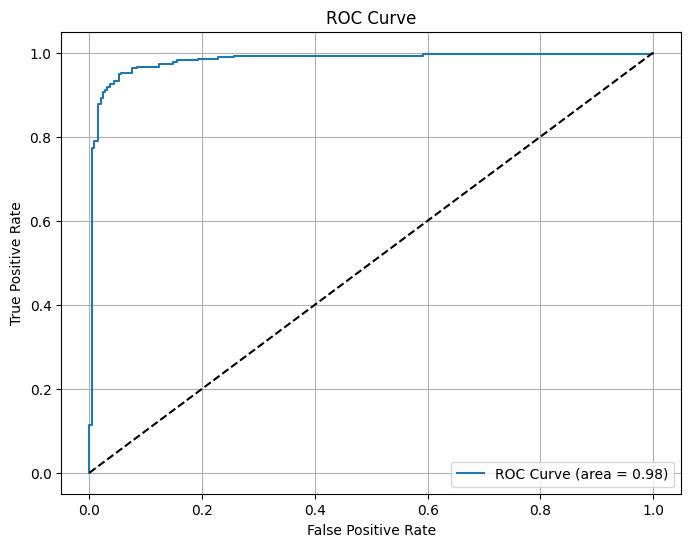

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = best_model.predict_proba(Xcount_test_transformed_ngr)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='real')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score
import numpy as np

#Membuat K Fold data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Prediksi
y_train_pred = best_model.predict(Xcount_train_transformed_ngr)
y_test_pred = best_model.predict(Xcount_test_transformed_ngr)

#Evaluasi
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

#Crossval dengan recall
cv_scores = []

for train_idx, val_idx in cv.split(Xcount_train_transformed_ngr, y_train):
    X_fold_train, X_fold_val = Xcount_train_transformed_ngr[train_idx], Xcount_train_transformed_ngr[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

    #Train the classifier on this fold
    best_model.fit(X_fold_train, y_fold_train)

    #Predict on the validation fold
    y_fold_pred = best_model.predict(X_fold_val)

    #Calculate recall
    recall = recall_score(y_fold_val, y_fold_pred, average="macro", zero_division=1)
    cv_scores.append(recall)

    # # Debugging: Check unique labels predicted
    # print(f"Fold {len(cv_scores)} - Unique Predictions: {np.unique(y_fold_pred)}")

cv_scores = np.array(cv_scores)

#Hitung mean dan standar deviasi
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

#Threshold overfit
threshold = mean_cv_score - 2 * std_cv_score #Normal assumption

print(f"Cross-validation Recall Scores: {cv_scores}")
print(f"Cross-validation Mean Recall: {mean_cv_score:.4f}")
print(f"Cross-validation Recall Std Dev: {std_cv_score:.4f}")
print(f"Threshold for Overfitting Detection: {threshold:.4f}")

#Cek overfit
if test_acc < threshold:
    print("Potential overfitting detected!")
else:
    print("Model generalizes well.")


Training Accuracy: 1.0000
Testing Accuracy: 0.9404
Cross-validation Recall Scores: [0.94634146 0.92152345 0.87517934 0.89659766 0.88805766]
Cross-validation Mean Recall: 0.9055
Cross-validation Recall Std Dev: 0.0254
Threshold for Overfitting Detection: 0.8547
Model generalizes well.


## Support Vector Machine

Accuracy Score: 0.9269
Classification Report:
              precision    recall  f1-score   support

        fake       0.93      0.92      0.92       250
        real       0.92      0.94      0.93       270

    accuracy                           0.93       520
   macro avg       0.93      0.93      0.93       520
weighted avg       0.93      0.93      0.93       520



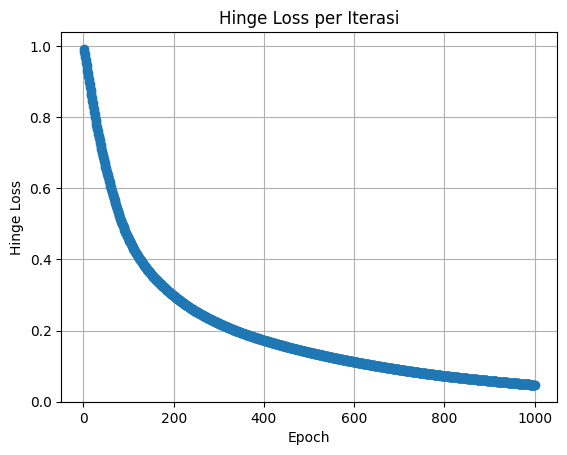

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, hinge_loss
import matplotlib.pyplot as plt
import numpy as np

# SVM dengan SGD
svm_iter = SGDClassifier(loss='hinge', learning_rate='constant', eta0=0.001, max_iter=1, warm_start=True, random_state=42)

# Track loss
loss_history = []
epochs = 1000

classes = np.unique(y_train)

for epoch in range(epochs):
    svm_iter.partial_fit(X_train_transformed, y_train, classes=classes)

    decision_values = svm_iter.decision_function(X_train_transformed)

    loss = hinge_loss(y_train, decision_values)
    loss_history.append(loss)

y_pred_iter = svm_iter.predict(X_test_transformed)

print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_iter)))
print(f"Classification Report:\n{classification_report(y_test, y_pred_iter)}")

# Plot loss
plt.plot(range(1, epochs+1), loss_history, marker='o')
plt.title('Hinge Loss per Iterasi')
plt.xlabel('Epoch')
plt.ylabel('Hinge Loss')
plt.grid(True)
plt.show()


In [ ]:
#Hyperparameter tuning

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

svc= SVC()

# Hyperparameter
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_transformed, y_train)

# Get the best model
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_transformed)

# Print results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.926923076923077
Classification Report:
              precision    recall  f1-score   support

        fake       0.93      0.92      0.92       250
        real       0.93      0.93      0.93       270

    accuracy                           0.93       520
   macro avg       0.93      0.93      0.93       520
weighted avg       0.93      0.93      0.93       520



In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

svc.fit(X_train_transformed, y_train)
# Predictions
y_train_pred = svc.predict(X_train_transformed)
y_test_pred = svc.predict(X_test_transformed)

# Evaluate accuracy on training and test sets
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")
#crossval
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svc, X_train_transformed, y_train, cv=cv)

mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

#threshold overfit
threshold = mean_cv_score - 2 * std_cv_score

print(f"Cross-validation Mean Score: {mean_cv_score:.4f}")
print(f"Cross-validation Score Std Dev: {std_cv_score:.4f}")
print(f"Threshold for Overfitting Detection: {threshold:.4f}")

# Check for overfitting
if test_acc < threshold:
    print("Potential overfitting detected!")
else:
    print("Model generalizes well.")

Training Accuracy: 0.9983
Testing Accuracy: 0.9308
Cross-validation Mean Score: 0.9142
Cross-validation Score Std Dev: 0.0186
Threshold for Overfitting Detection: 0.8770
Model generalizes well.


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score
import numpy as np

#K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Predictions
y_train_pred = svc.predict(X_train_transformed)
y_test_pred = svc.predict(X_test_transformed)

#Evaluate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

#cross-validation with recall scoring
cv_scores = []

for train_idx, val_idx in cv.split(X_train_transformed, y_train):
    X_fold_train, X_fold_val = X_train_transformed[train_idx], X_train_transformed[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

    svc.fit(X_fold_train, y_fold_train)

    y_fold_pred = svc.predict(X_fold_val)

    recall = recall_score(y_fold_val, y_fold_pred, average="macro", zero_division=1)
    cv_scores.append(recall)

cv_scores = np.array(cv_scores)

#Calculate mean and standard deviation
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

#Threshold for overfit
threshold = mean_cv_score - 2 * std_cv_score #Normal assumption

print(f"Cross-validation Recall Scores: {cv_scores}")
print(f"Cross-validation Mean Recall: {mean_cv_score:.4f}")
print(f"Cross-validation Recall Std Dev: {std_cv_score:.4f}")
print(f"Threshold for Overfitting Detection: {threshold:.4f}")

#Check for overfit
if test_acc < threshold:
    print("Potential overfitting detected!")
else:
    print("Model generalizes well.")


Training Accuracy: 0.9983
Testing Accuracy: 0.9308
Cross-validation Recall Scores: [0.9429878  0.90607211 0.89659766 0.93034775 0.89728086]
Cross-validation Mean Recall: 0.9147
Cross-validation Recall Std Dev: 0.0187
Threshold for Overfitting Detection: 0.8772
Model generalizes well.


Optimal TF-IDF feature percentage: 35%
Accuracy: 0.9230769230769231
Classification Report:
              precision    recall  f1-score   support

        fake       0.92      0.92      0.92       250
        real       0.92      0.93      0.93       270

    accuracy                           0.92       520
   macro avg       0.92      0.92      0.92       520
weighted avg       0.92      0.92      0.92       520



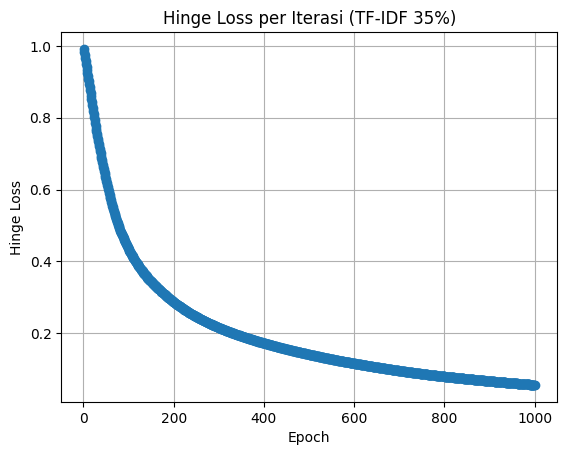

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, hinge_loss
import matplotlib.pyplot as plt
import numpy as np

max_recall = 0.5  # awal
optimal_percentage = 0
optimal_loss_history = []
epochs = 1000

for i in range(5, 100, 5):
    # TF-IDF Limited
    vectorizer_limited = TfidfVectorizer(max_features=int(i/100 * X_train_transformed.shape[1]))
    X_train_limited = vectorizer_limited.fit_transform(X_train)
    X_test_limited = vectorizer_limited.transform(X_test)

    # Inisialisasi ulang model tiap loop
    svm_iter = SGDClassifier(loss='hinge', learning_rate='constant', eta0=0.001,
                             max_iter=1, warm_start=True, random_state=42)

    # Track loss
    loss_history = []
    classes = np.unique(y_train)

    for epoch in range(epochs):
        svm_iter.partial_fit(X_train_limited, y_train, classes=classes)
        decision_values = svm_iter.decision_function(X_train_limited)
        loss = hinge_loss(y_train, decision_values)
        loss_history.append(loss)

    # Prediksi
    y_pred = svm_iter.predict(X_test_limited)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Cek recall 'fake'
    if report['fake']['recall'] > max_recall:
        max_recall = report['fake']['recall']
        optimal_percentage = i
        optimal_loss_history = loss_history.copy()
        pred_optimal = y_pred

# Tampilkan hasil optimal
print(f"Optimal TF-IDF feature percentage: {optimal_percentage}%")
print(f"Accuracy: {accuracy_score(y_test, pred_optimal)}")
print(f"Classification Report:\n{classification_report(y_test, pred_optimal)}")

# Plot loss di setting optimal
plt.plot(range(1, epochs+1), optimal_loss_history, marker='o')
plt.title(f'Hinge Loss per Iterasi (TF-IDF {optimal_percentage}%)')
plt.xlabel('Epoch')
plt.ylabel('Hinge Loss')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# data scaling
scaler = StandardScaler(with_mean=False)

# scale train and test data
X_train_scaled = scaler.fit_transform(Xcount_train_transformed)
X_test_scaled = scaler.transform(Xcount_test_transformed)


Accuracy Score: 0.9058
Classification Report:
              precision    recall  f1-score   support

        fake       0.89      0.92      0.90       250
        real       0.92      0.90      0.91       270

    accuracy                           0.91       520
   macro avg       0.91      0.91      0.91       520
weighted avg       0.91      0.91      0.91       520



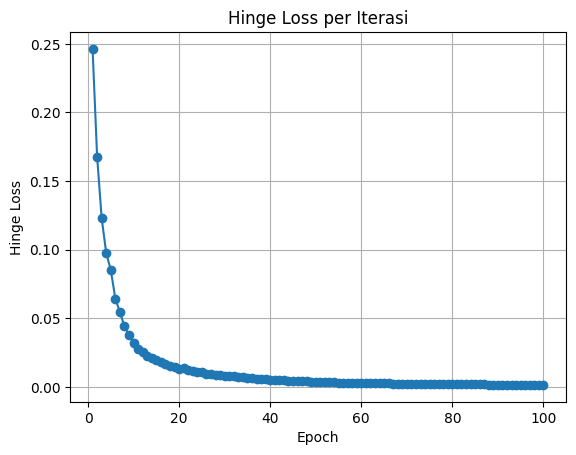

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, hinge_loss
import matplotlib.pyplot as plt
import numpy as np

# Inisialisasi model SVM dengan SGD
svm_iter = SGDClassifier(loss='hinge', learning_rate='constant', eta0=0.001, max_iter=1, warm_start=True, random_state=42)

# Track loss
loss_history = []
epochs = 100

# Partial fit butuh tau dulu kelasnya
classes = np.unique(y_train)

for epoch in range(epochs):
    # Training 1 iterasi
    svm_iter.partial_fit(Xcount_train_transformed, y_train, classes=classes)

    # Predict decision function (jarak ke hyperplane)
    decision_values = svm_iter.decision_function(Xcount_train_transformed)

    # Hitung hinge loss
    loss = hinge_loss(y_train, decision_values)
    loss_history.append(loss)

# Prediksi hasil akhir
y_pred_iter = svm_iter.predict(Xcount_test_transformed)

# Evaluasi
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_iter)))
print(f"Classification Report:\n{classification_report(y_test, y_pred_iter)}")

# Plot loss per iterasi
plt.plot(range(1, epochs+1), loss_history, marker='o')
plt.title('Hinge Loss per Iterasi')
plt.xlabel('Epoch')
plt.ylabel('Hinge Loss')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler with with_mean=False
scaler = StandardScaler(with_mean=False)

# Scale the training and test data
X_train_scaled_ngr = scaler.fit_transform(Xcount_train_transformed_ngr)
X_test_scaled_ngr = scaler.transform(Xcount_test_transformed_ngr)


Accuracy Score: 0.9308
Classification Report:
              precision    recall  f1-score   support

        fake       0.90      0.96      0.93       250
        real       0.96      0.90      0.93       270

    accuracy                           0.93       520
   macro avg       0.93      0.93      0.93       520
weighted avg       0.93      0.93      0.93       520



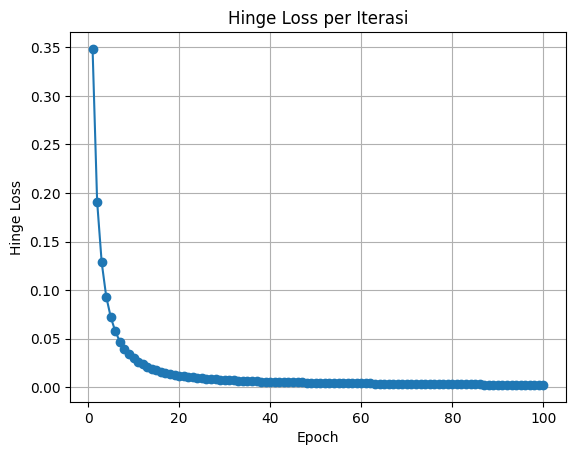

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, hinge_loss
import matplotlib.pyplot as plt
import numpy as np

svm_iter = SGDClassifier(loss='hinge', learning_rate='constant', eta0=0.001, max_iter=1, warm_start=True, random_state=42)

# Track loss
loss_history = []
epochs = 100

# Partial fit
classes = np.unique(y_train)

for epoch in range(epochs):
    svm_iter.partial_fit(Xcount_train_transformed_ngr, y_train, classes=classes)
    decision_values = svm_iter.decision_function(Xcount_train_transformed_ngr)
    loss = hinge_loss(y_train, decision_values)
    loss_history.append(loss)

# Prediksi
y_pred_iter = svm_iter.predict(Xcount_test_transformed_ngr)

# Evaluasi
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_iter)))
print(f"Classification Report:\n{classification_report(y_test, y_pred_iter)}")

# Plot loss
plt.plot(range(1, epochs+1), loss_history, marker='o')
plt.title('Hinge Loss per Iterasi')
plt.xlabel('Epoch')
plt.ylabel('Hinge Loss')
plt.grid(True)
plt.show()


Best Params: {'learning_rate': 'optimal', 'eta0': 0.001, 'alpha': 0.01}
Accuracy: 0.9481
Classification Report:
               precision    recall  f1-score   support

        fake       0.94      0.95      0.95       250
        real       0.95      0.95      0.95       270

    accuracy                           0.95       520
   macro avg       0.95      0.95      0.95       520
weighted avg       0.95      0.95      0.95       520



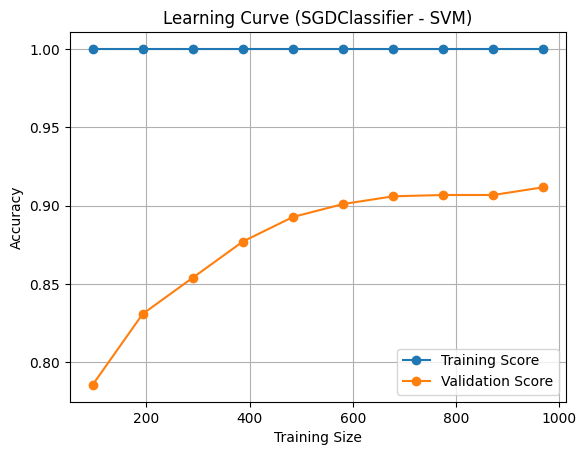

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV, learning_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Parameter grid
param_dist = {
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal'],
    'eta0': [0.001, 0.01, 0.1]
}

# Randomized Search
rand_search_iter = RandomizedSearchCV(
    SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42),
    param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42
)
rand_search_iter.fit(Xcount_train_transformed_ngr, y_train)

# Hasil terbaik
print("Best Params:", rand_search_iter.best_params_)

# Prediksi
y_pred_best_iter = rand_search_iter.predict(Xcount_test_transformed_ngr)
acc_best_iter = accuracy_score(y_test, y_pred_best_iter)
print(f"Accuracy: {acc_best_iter:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_best_iter))

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rand_search_iter.best_estimator_, Xcount_train_transformed_ngr, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation Score')
plt.title('Learning Curve (SGDClassifier - SVM)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


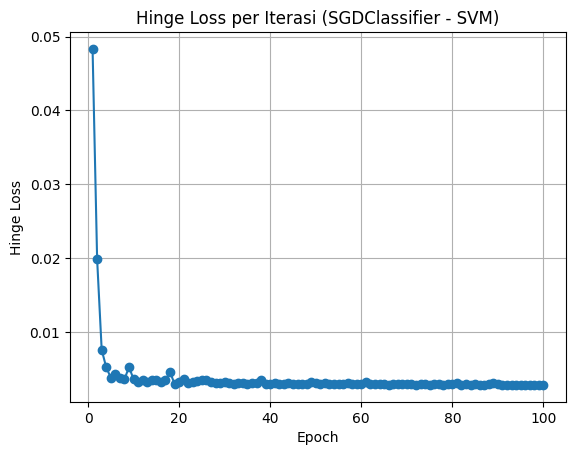

In [ ]:
# Ambil model terbaik
best_params = rand_search_iter.best_params_
svm_iter_best = SGDClassifier(
    loss='hinge',
    max_iter=1,
    tol=None,
    random_state=42,
    **best_params,
    warm_start=True
)

epochs = 100
classes = np.unique(y_train)
loss_history = []

for epoch in range(epochs):
    svm_iter_best.partial_fit(Xcount_train_transformed_ngr, y_train, classes=classes)
    decision_values = svm_iter_best.decision_function(Xcount_train_transformed_ngr)
    loss = hinge_loss(y_train, decision_values)
    loss_history.append(loss)

# Plot Loss
plt.plot(range(1, epochs+1), loss_history, marker='o')
plt.title('Hinge Loss per Iterasi (SGDClassifier - SVM)')
plt.xlabel('Epoch')
plt.ylabel('Hinge Loss')
plt.grid(True)
plt.show()

## K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
max = 0.5
for i in range(3,11,2):
  knn = KNeighborsClassifier(n_neighbors=i)

  knn.fit(X_train_transformed, y_train)

  y_pred = knn.predict(X_test_transformed)
  report = classification_report(y_test, y_pred, output_dict=True)
  if report['fake']['recall'] > max:
    max = report['fake']['recall']
    pred_opt = y_pred
    neighbors = i

print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, pred_opt)))
print(f"Classification Report:\n{classification_report(y_test, pred_opt)}")
print(neighbors)

Accuracy Score: 0.8846
Classification Report:
              precision    recall  f1-score   support

        fake       0.84      0.93      0.89       250
        real       0.93      0.84      0.88       270

    accuracy                           0.88       520
   macro avg       0.89      0.89      0.88       520
weighted avg       0.89      0.88      0.88       520

7


In [ ]:
print(X_train_transformed.shape, y_train.shape)

(1212, 20057) (1212,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_trains = le.fit_transform(y_train)
y_tests = le.transform(y_test)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
Accuracy: 0.8903846153846153
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       250
           1       0.92      0.86      0.89       270

    accuracy                           0.89       520
   macro avg       0.89      0.89      0.89       520
weighted avg       0.89      0.89      0.89       520



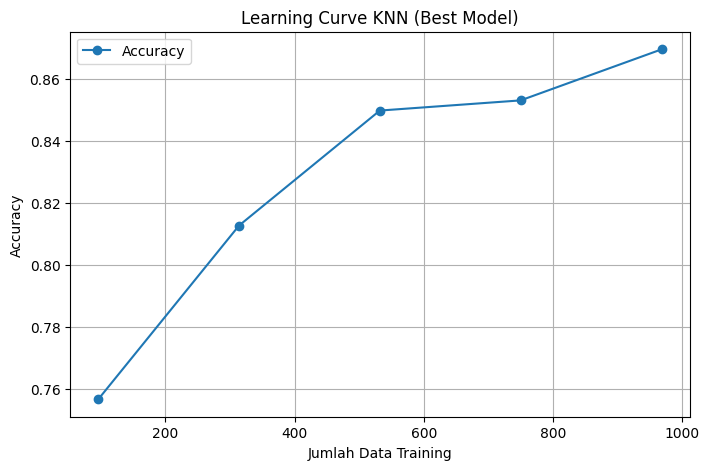

In [ ]:
# Import Library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameter Tuning
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_transformed, y_trains)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test_transformed)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_tests, y_pred)}")
print(f"Classification Report:\n{classification_report(y_tests, y_pred)}")

# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    best_knn, X_train_transformed, y_trains,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42
)

# Rata-rata hasil
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(8, 5))
# plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', label='Accuracy')
plt.xlabel('Jumlah Data Training')
plt.ylabel('Accuracy')
plt.title('Learning Curve KNN (Best Model)')
plt.legend()
plt.grid(True)
plt.show()


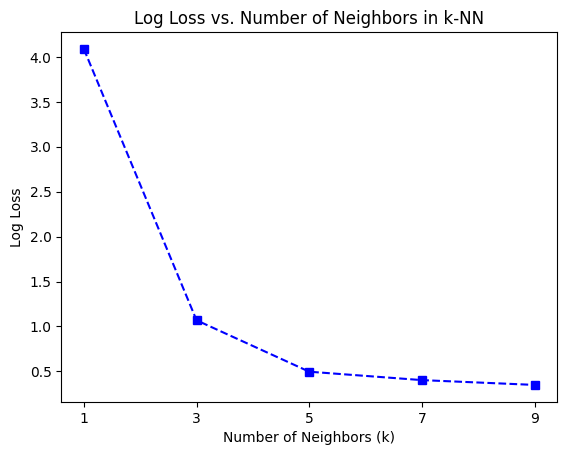

In [ ]:
from sklearn.metrics import log_loss
#Elbow method

log_losses = []
k_values = [i for i in range(1,11,2)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_transformed, y_train)
    y_prob = knn.predict_proba(X_test_transformed)

    # Compute log loss
    loss = log_loss(y_test, y_prob)
    log_losses.append(loss)

# Plot log loss vs. k
plt.plot(k_values, log_losses, marker='s', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Log Loss")
plt.title("Log Loss vs. Number of Neighbors in k-NN")
plt.xticks(k_values)
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score
import numpy as np

#K-Fold Data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_train_pred = knn.predict(X_train_transformed)
y_test_pred = knn.predict(X_test_transformed)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

#Cross validation recall
cv_scores = []

for train_idx, val_idx in cv.split(X_train_transformed, y_train):
    X_fold_train, X_fold_val = X_train_transformed[train_idx], X_train_transformed[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

    knn.fit(X_fold_train, y_fold_train)

    y_fold_pred = knn.predict(X_fold_val)

    recall = recall_score(y_fold_val, y_fold_pred, average="macro", zero_division=1)
    cv_scores.append(recall)

cv_scores = np.array(cv_scores)

#Calculate mean and standard deviation
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

#Threshold for overfit
threshold = mean_cv_score - 2 * std_cv_score #Normal assumption

print(f"Cross-validation Recall Scores: {cv_scores}")
print(f"Cross-validation Mean Recall: {mean_cv_score:.4f}")
print(f"Cross-validation Recall Std Dev: {std_cv_score:.4f}")
print(f"Threshold for Overfitting Detection: {threshold:.4f}")

#Check for overfit
if test_acc < threshold:
    print("Potential overfitting detected!")
else:
    print("Model generalizes well.")


Training Accuracy: 0.8911
Testing Accuracy: 0.8750
Cross-validation Recall Scores: [0.8476626  0.85514367 0.81283733 0.84590422 0.85037918]
Cross-validation Mean Recall: 0.8424
Cross-validation Recall Std Dev: 0.0151
Threshold for Overfitting Detection: 0.8122
Model generalizes well.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
max = 0.5
for i in range(3,11,2):
  for j in range(5,100,5):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train_transformed, y_train)

    y_pred = knn.predict(X_test_transformed)
    report = classification_report(y_test, y_pred, output_dict=True)
    if report['fake']['recall'] > max:
      max = report['fake']['recall']
      features = j/100*X_train_transformed.shape[1]
      pred_opt = y_pred
      neighbors = i


print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, pred_opt)))
print(f"Classification Report:\n{classification_report(y_test, pred_opt)}")
print(neighbors)
print(features)

Accuracy Score: 0.8846
Classification Report:
              precision    recall  f1-score   support

        fake       0.84      0.93      0.89       250
        real       0.93      0.84      0.88       270

    accuracy                           0.88       520
   macro avg       0.89      0.89      0.88       520
weighted avg       0.89      0.88      0.88       520

7
1002.85


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

# Scale data
X_train_scaled = scaler.fit_transform(Xcount_train_transformed)
X_test_scaled = scaler.transform(Xcount_test_transformed)


In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
max = 0.5
for i in range(3,11,2):
  # Initialize the k-NN model (default k=5)
  knn = KNeighborsClassifier(n_neighbors=i)

  # Train the model
  knn.fit(X_train_scaled, y_train)

  # Make predictions
  y_pred = knn.predict(X_test_scaled)
  report = classification_report(y_test, y_pred, output_dict=True)
  if report['fake']['recall'] > max:
    max = report['fake']['recall']
    pred_opt = y_pred
    neighbors = i


# Calculate accuracy and evaluation metrics
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, pred_opt)))
print(f"Classification Report:\n{classification_report(y_test, pred_opt)}")
print(neighbors)

Accuracy Score: 0.5500
Classification Report:
              precision    recall  f1-score   support

        fake       0.52      1.00      0.68       250
        real       1.00      0.13      0.24       270

    accuracy                           0.55       520
   macro avg       0.76      0.57      0.46       520
weighted avg       0.77      0.55      0.45       520

3


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
max = 0.5
for i in range(3,11,2):
  knn = KNeighborsClassifier(n_neighbors=i)

  knn.fit(Xcount_train_transformed, y_train)

  y_pred = knn.predict(Xcount_test_transformed)
  report = classification_report(y_test, y_pred, output_dict=True)
  if report['fake']['recall'] > max:
    max = report['fake']['recall']
    pred_opt = y_pred
    neighbors = i

print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, pred_opt)))
print(f"Classification Report:\n{classification_report(y_test, pred_opt)}")
print(neighbors)

Accuracy Score: 0.6788
Classification Report:
              precision    recall  f1-score   support

        fake       0.60      0.98      0.75       250
        real       0.96      0.40      0.56       270

    accuracy                           0.68       520
   macro avg       0.78      0.69      0.65       520
weighted avg       0.79      0.68      0.65       520

5


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled_ngr = scaler.fit_transform(Xcount_train_transformed_ngr)
X_test_scaled_ngr = scaler.transform(Xcount_test_transformed_ngr)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
max = 0.5
for i in range(3,11,2):
  knn = KNeighborsClassifier(n_neighbors=i)

  knn.fit(X_train_scaled_ngr, y_train)

  y_pred = knn.predict(X_test_scaled_ngr)
  report = classification_report(y_test, y_pred, output_dict=True)
  if report['fake']['recall'] > max:
    max = report['fake']['recall']
    pred_opt = y_pred
    neighbors = i

print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, pred_opt)))
print(f"Classification Report:\n{classification_report(y_test, pred_opt)}")
print(neighbors)

Accuracy Score: 0.8115
Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.61      0.76       250
        real       0.73      1.00      0.85       270

    accuracy                           0.81       520
   macro avg       0.87      0.80      0.80       520
weighted avg       0.86      0.81      0.80       520

3


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
max = 0.5
for i in range(3,11,2):
  knn = KNeighborsClassifier(n_neighbors=i)

  knn.fit(Xcount_train_transformed_ngr, y_train)

  y_pred = knn.predict(Xcount_test_transformed_ngr)
  report = classification_report(y_test, y_pred, output_dict=True)
  if report['fake']['recall'] > max:
    max = report['fake']['recall']
    pred_opt = y_pred
    neighbors = i

print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, pred_opt)))
print(f"Classification Report:\n{classification_report(y_test, pred_opt)}")
print(neighbors)

Accuracy Score: 0.6058
Classification Report:
              precision    recall  f1-score   support

        fake       0.55      1.00      0.71       250
        real       1.00      0.24      0.39       270

    accuracy                           0.61       520
   macro avg       0.77      0.62      0.55       520
weighted avg       0.78      0.61      0.54       520

3


## Decision Tree

In [ ]:
# TF IDF Default
dt = DecisionTreeClassifier()
dt.fit(X_train_transformed, y_train)

y_pred_dt = dt.predict(X_test_transformed)
print('Decision Tree - Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_dt)))
print(f"Decision Tree - Classification Report:\n{classification_report(y_test, y_pred_dt)}")

Decision Tree - Accuracy Score: 0.8019
Decision Tree - Classification Report:
              precision    recall  f1-score   support

        fake       0.77      0.84      0.80       250
        real       0.84      0.77      0.80       270

    accuracy                           0.80       520
   macro avg       0.80      0.80      0.80       520
weighted avg       0.80      0.80      0.80       520



In [ ]:
# Limited tf idf
max = 0.5

for i in range(5,100,5):
  vectorizer_limited = TfidfVectorizer(max_features=int(i/100*X_train_transformed.shape[1]//1))
  X_train_transformed_limited = vectorizer_limited.fit_transform(X_train)
  X_test_transformed_limited = vectorizer_limited.transform(X_test)

  dt.fit(X_train_transformed_limited, y_train)

  # Predict
  y_pred = dt.predict(X_test_transformed_limited)
  report = classification_report(y_test, y_pred, output_dict=True)
  if report['fake']['recall'] > max:
    max = report['fake']['recall']
    features = i/100*X_train_transformed.shape[1]
    pred_opt = y_pred
    maxf = int(i/100*X_train_transformed.shape[1]//1)

print(f"Accuracy: {accuracy_score(y_test, pred_opt)}")
print(f"Classification Report:\n{classification_report(y_test, pred_opt)}")
print(maxf)

Accuracy: 0.8461538461538461
Classification Report:
              precision    recall  f1-score   support

        fake       0.81      0.89      0.85       250
        real       0.89      0.80      0.84       270

    accuracy                           0.85       520
   macro avg       0.85      0.85      0.85       520
weighted avg       0.85      0.85      0.85       520

11031


In [ ]:
# bag of words
dt = DecisionTreeClassifier()
dt.fit(Xcount_train_transformed, y_train)

y_pred_dt = dt.predict(Xcount_test_transformed)
print('Decision Tree - Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_dt)))
print(f"Decision Tree - Classification Report:\n{classification_report(y_test, y_pred_dt)}")

Decision Tree - Accuracy Score: 0.8154
Decision Tree - Classification Report:
              precision    recall  f1-score   support

        fake       0.79      0.84      0.81       250
        real       0.84      0.79      0.82       270

    accuracy                           0.82       520
   macro avg       0.82      0.82      0.82       520
weighted avg       0.82      0.82      0.82       520



In [ ]:
# n gram
dt = DecisionTreeClassifier()
dt.fit(Xcount_train_transformed_ngr, y_train)

y_pred_dt = dt.predict(Xcount_test_transformed_ngr)
print('Decision Tree - Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_dt)))
print(f"Decision Tree - Classification Report:\n{classification_report(y_test, y_pred_dt)}")

Decision Tree - Accuracy Score: 0.8865
Decision Tree - Classification Report:
              precision    recall  f1-score   support

        fake       0.90      0.86      0.88       250
        real       0.87      0.91      0.89       270

    accuracy                           0.89       520
   macro avg       0.89      0.89      0.89       520
weighted avg       0.89      0.89      0.89       520



In [ ]:
# Hyperparameter Tuning
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xcount_train_transformed_ngr, y_train)

best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(Xcount_test_transformed_ngr)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Decision Tree - Classification Report:\n{classification_report(y_test, y_pred)}")

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.8807692307692307
Decision Tree - Classification Report:
              precision    recall  f1-score   support

        fake       0.89      0.85      0.87       250
        real       0.87      0.91      0.89       270

    accuracy                           0.88       520
   macro avg       0.88      0.88      0.88       520
weighted avg       0.88      0.88      0.88       520



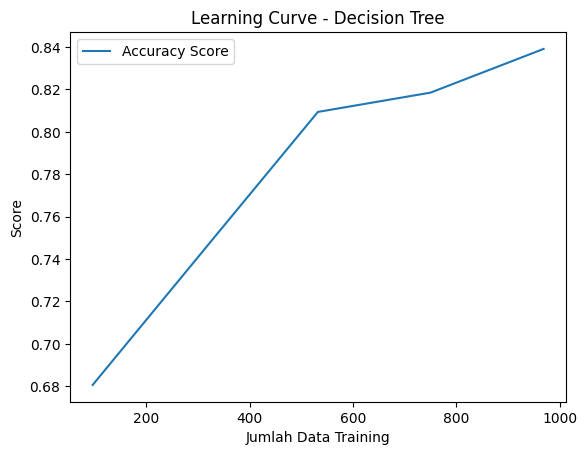

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(dt, Xcount_train_transformed_ngr, y_train, cv=5)

# plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Accuracy Score")
plt.xlabel("Jumlah Data Training")
plt.ylabel("Score")
plt.title("Learning Curve - Decision Tree")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score
import numpy as np

#Stratified K-Fold to Randomize the Data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Predictions
y_train_pred = dt.predict(Xcount_train_transformed_ngr)
y_test_pred = dt.predict(Xcount_test_transformed_ngr)

#Evaluate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

#Manually perform cross-validation with recall scoring
cv_scores = []

for train_idx, val_idx in cv.split(Xcount_train_transformed_ngr, y_train):
    X_fold_train, X_fold_val = Xcount_train_transformed_ngr[train_idx], Xcount_train_transformed_ngr[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

    #Train the classifier on this fold
    dt.fit(X_fold_train, y_fold_train)

    #Predict on the validation fold
    y_fold_pred = dt.predict(X_fold_val)

    #Calculate recall
    recall = recall_score(y_fold_val, y_fold_pred, average="macro", zero_division=1)
    cv_scores.append(recall)

    # # Debugging: Check unique labels predicted
    # print(f"Fold {len(cv_scores)} - Unique Predictions: {np.unique(y_fold_pred)}")

cv_scores = np.array(cv_scores)

#Calculate mean and standard deviation
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

#Threshold for overfitting detection
threshold = mean_cv_score - 2 * std_cv_score #Normal assumption

print(f"Cross-validation Recall Scores: {cv_scores}")
print(f"Cross-validation Mean Recall: {mean_cv_score:.4f}")
print(f"Cross-validation Recall Std Dev: {std_cv_score:.4f}")
print(f"Threshold for Overfitting Detection: {threshold:.4f}")

#Check for overfitting
if test_acc < threshold:
    print("Potential overfitting detected!")
else:
    print("Model generalizes well.")


Training Accuracy: 1.0000
Testing Accuracy: 0.8885
Cross-validation Recall Scores: [0.81971545 0.80726484 0.81799549 0.86448726 0.84320557]
Cross-validation Mean Recall: 0.8305
Cross-validation Recall Std Dev: 0.0206
Threshold for Overfitting Detection: 0.7893
Model generalizes well.


## Random Forest

In [ ]:
# TF IDF Default
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_transformed, y_train)

y_pred_rf = rf.predict(X_test_transformed)
print('Random Forest - Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)))
print(f"Random Forest - Classification Report:\n{classification_report(y_test, y_pred_rf)}")

Random Forest - Accuracy Score: 0.9077
Random Forest - Classification Report:
              precision    recall  f1-score   support

        fake       0.89      0.92      0.91       250
        real       0.92      0.90      0.91       270

    accuracy                           0.91       520
   macro avg       0.91      0.91      0.91       520
weighted avg       0.91      0.91      0.91       520



In [ ]:
# Limited tf idf
max = 0.5

for i in range(5,100,5):
  vectorizer_limited = TfidfVectorizer(max_features=int(i/100*X_train_transformed.shape[1]//1))
  X_train_transformed_limited = vectorizer_limited.fit_transform(X_train)
  X_test_transformed_limited = vectorizer_limited.transform(X_test)

  rf.fit(X_train_transformed_limited, y_train)

  y_pred = rf.predict(X_test_transformed_limited)
  report = classification_report(y_test, y_pred, output_dict=True)
  if report['fake']['recall'] > max:
    max = report['fake']['recall']
    features = i/100*X_train_transformed.shape[1]
    pred_opt = y_pred
    maxf = int(i/100*X_train_transformed.shape[1]//1)

print(f"Accuracy: {accuracy_score(y_test, pred_opt)}")
print(f"Classification Report:\n{classification_report(y_test, pred_opt)}")
print(maxf)

Accuracy: 0.9076923076923077
Classification Report:
              precision    recall  f1-score   support

        fake       0.89      0.92      0.91       250
        real       0.93      0.89      0.91       270

    accuracy                           0.91       520
   macro avg       0.91      0.91      0.91       520
weighted avg       0.91      0.91      0.91       520

7019


In [ ]:
# bag of words
# Random Forest
rf = RandomForestClassifier()
rf.fit(Xcount_train_transformed, y_train)

y_pred_rf = rf.predict(Xcount_test_transformed)
print('Random Forest - Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)))
print(f"Random Forest - Classification Report:\n{classification_report(y_test, y_pred_rf)}")

Random Forest - Accuracy Score: 0.9269
Random Forest - Classification Report:
              precision    recall  f1-score   support

        fake       0.92      0.92      0.92       250
        real       0.93      0.93      0.93       270

    accuracy                           0.93       520
   macro avg       0.93      0.93      0.93       520
weighted avg       0.93      0.93      0.93       520



In [ ]:
# n gram bag of words
# Random Forest
rf = RandomForestClassifier()
rf.fit(Xcount_train_transformed_ngr, y_train)

y_pred_rf = rf.predict(Xcount_test_transformed_ngr)
print('Random Forest - Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)))
print(f"Random Forest - Classification Report:\n{classification_report(y_test, y_pred_rf)}")


Random Forest - Accuracy Score: 0.9365
Random Forest - Classification Report:
              precision    recall  f1-score   support

        fake       0.99      0.88      0.93       250
        real       0.90      0.99      0.94       270

    accuracy                           0.94       520
   macro avg       0.94      0.93      0.94       520
weighted avg       0.94      0.94      0.94       520



In [ ]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(Xcount_train_transformed_ngr, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(Xcount_test_transformed_ngr)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9519230769230769


In [ ]:
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

Classification Report:
               precision    recall  f1-score   support

        fake       0.97      0.92      0.95       250
        real       0.93      0.98      0.95       270

    accuracy                           0.95       520
   macro avg       0.95      0.95      0.95       520
weighted avg       0.95      0.95      0.95       520



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score
import numpy as np

#K-Fold Data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Predict
y_train_pred = rf.predict(Xcount_train_transformed_ngr)
y_test_pred = rf.predict(Xcount_test_transformed_ngr)

#Evaluate
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

#Cross validation recall
cv_scores = []

for train_idx, val_idx in cv.split(Xcount_train_transformed_ngr, y_trains):
    X_fold_train, X_fold_val = Xcount_train_transformed_ngr[train_idx], Xcount_train_transformed_ngr[val_idx]
    y_fold_train, y_fold_val = y_trains[train_idx], y_trains[val_idx]

    rf.fit(X_fold_train, y_fold_train)

    y_fold_pred = rf.predict(X_fold_val)

    recall = recall_score(y_fold_val, y_fold_pred, average="macro", zero_division=1)
    cv_scores.append(recall)


cv_scores = np.array(cv_scores)

#Calculate mean and standard deviation
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

#Threshold for overfit
threshold = mean_cv_score - 2 * std_cv_score #Normal assumption

print(f"Cross-validation Recall Scores: {cv_scores}")
print(f"Cross-validation Mean Recall: {mean_cv_score:.4f}")
print(f"Cross-validation Recall Std Dev: {std_cv_score:.4f}")
print(f"Threshold for Overfitting Detection: {threshold:.4f}")

#Check for overfitt
if test_acc < threshold:
    print("Potential overfitting detected!")
else:
    print("Model generalizes well.")


Training Accuracy: 1.0000
Testing Accuracy: 0.9365
Cross-validation Recall Scores: [0.88577236 0.87886284 0.90093598 0.89714422 0.90175582]
Cross-validation Mean Recall: 0.8929
Cross-validation Recall Std Dev: 0.0090
Threshold for Overfitting Detection: 0.8748
Model generalizes well.


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too fe

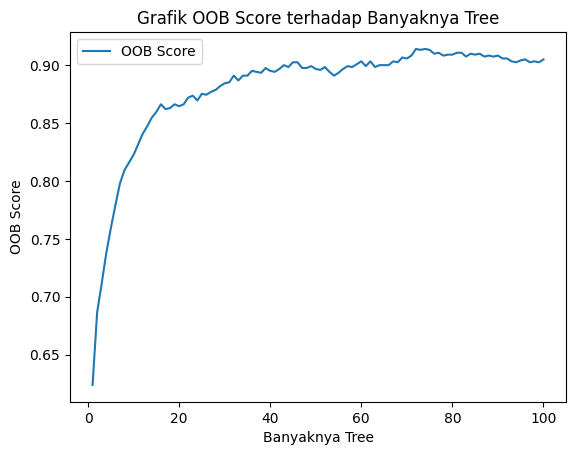

In [ ]:
oob_scores = []
n_estimators_range = range(1, 101)

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42, warm_start=True)
    rf.fit(Xcount_train_transformed_ngr, y_train)
    oob_scores.append(rf.oob_score_)

# Plot OOB Score
plt.plot(n_estimators_range, oob_scores, label="OOB Score")
plt.xlabel("Banyaknya Tree")
plt.ylabel("OOB Score")
plt.title("Grafik OOB Score terhadap Banyaknya Tree")
plt.legend()
plt.show()


## XGBoost

In [ ]:
# TF IDF Default
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
xgb = XGBClassifier(eval_metric='mlogloss')  # Ensure eval_metric is set to avoid warnings
xgb.fit(X_train_transformed, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test_transformed)
print('XGBoost - Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_xgb)))
print(f"XGBoost - Classification Report:\n{classification_report(y_test, y_pred_xgb)}")

XGBoost - Accuracy Score: 0.9077
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       250
           1       0.92      0.90      0.91       270

    accuracy                           0.91       520
   macro avg       0.91      0.91      0.91       520
weighted avg       0.91      0.91      0.91       520



In [ ]:
# Limited tf idf
max = 0.5

for i in range(5,100,5):
  vectorizer_limited = TfidfVectorizer(max_features=int(i/100*X_train_transformed.shape[1]//1))
  X_train_transformed_limited = vectorizer_limited.fit_transform(X_train)
  X_test_transformed_limited = vectorizer_limited.transform(X_test)

  xgb.fit(X_train_transformed_limited, y_train)

  # Predict
  y_pred = xgb.predict(X_test_transformed_limited)
  report = classification_report(y_test, y_pred, output_dict=True)
  if report['0']['recall'] > max:
    max = report['0']['recall']
    features = i/100*X_train_transformed.shape[1]
    pred_opt = y_pred
    maxf = int(i/100*X_train_transformed.shape[1]//1)

print(f"Accuracy: {accuracy_score(y_test, pred_opt)}")
print(f"Classification Report:\n{classification_report(y_test, pred_opt)}")
print(maxf)

Accuracy: 0.9173076923076923
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       250
           1       0.93      0.91      0.92       270

    accuracy                           0.92       520
   macro avg       0.92      0.92      0.92       520
weighted avg       0.92      0.92      0.92       520

5014


In [ ]:
# XGBoost
# bag of words
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test_scaled)
print('XGBoost - Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_xgb)))
print(f"XGBoost - Classification Report:\n{classification_report(y_test, y_pred_xgb)}")

XGBoost - Accuracy Score: 0.9173
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       250
           1       0.93      0.91      0.92       270

    accuracy                           0.92       520
   macro avg       0.92      0.92      0.92       520
weighted avg       0.92      0.92      0.92       520



In [ ]:
# XGBoost
# n gram bag of words
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
xgb = XGBClassifier(eval_metric='mlogloss')  # Ensure eval_metric is set to avoid warnings
xgb.fit(X_train_scaled_ngr, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test_scaled_ngr)
print('XGBoost - Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_xgb)))
print(f"XGBoost - Classification Report:\n{classification_report(y_test, y_pred_xgb)}")

XGBoost - Accuracy Score: 0.9135
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       250
           1       0.91      0.93      0.92       270

    accuracy                           0.91       520
   macro avg       0.91      0.91      0.91       520
weighted avg       0.91      0.91      0.91       520



[0]	train-mlogloss:0.61055	eval-mlogloss:0.61527
[1]	train-mlogloss:0.55617	eval-mlogloss:0.56532
[2]	train-mlogloss:0.51695	eval-mlogloss:0.53229
[3]	train-mlogloss:0.48226	eval-mlogloss:0.49968
[4]	train-mlogloss:0.45544	eval-mlogloss:0.48227
[5]	train-mlogloss:0.43187	eval-mlogloss:0.46212
[6]	train-mlogloss:0.41395	eval-mlogloss:0.45430
[7]	train-mlogloss:0.39743	eval-mlogloss:0.43690
[8]	train-mlogloss:0.38331	eval-mlogloss:0.42038
[9]	train-mlogloss:0.36768	eval-mlogloss:0.41047
[10]	train-mlogloss:0.35370	eval-mlogloss:0.40076
[11]	train-mlogloss:0.34254	eval-mlogloss:0.39305
[12]	train-mlogloss:0.33312	eval-mlogloss:0.38715
[13]	train-mlogloss:0.32475	eval-mlogloss:0.38073
[14]	train-mlogloss:0.31367	eval-mlogloss:0.36947
[15]	train-mlogloss:0.30589	eval-mlogloss:0.36159
[16]	train-mlogloss:0.29797	eval-mlogloss:0.35870
[17]	train-mlogloss:0.28943	eval-mlogloss:0.35098
[18]	train-mlogloss:0.28053	eval-mlogloss:0.34719
[19]	train-mlogloss:0.27314	eval-mlogloss:0.33846
[20]	train

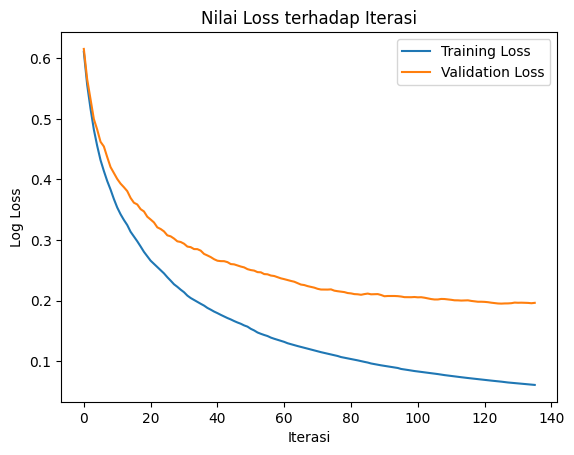

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Konversi dataset ke format DMatrix (format khusus untuk XGBoost)
dtrain = xgb.DMatrix(X_train_scaled_ngr, label=y_train_enc)
dtest = xgb.DMatrix(X_test_scaled_ngr, label=y_test_enc)

# Hyperparameter
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': len(le.classes_),  # Jumlah kelas dalam target
    'eval_metric': 'mlogloss'  # Log loss sebagai metric evaluasi
}

# menyimpan hasil evaluasi
evals_result = {}

# Training model
bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=300,  # Jumlah iterasi boosting
    evals=[(dtrain, 'train'), (dtest, 'eval')],
    early_stopping_rounds=10,  # Berhenti jika tidak ada peningkatan
    evals_result=evals_result,  # Menyimpan hasil evaluasi
    verbose_eval=True
)

# Plot loss selama training
plt.plot(evals_result['train']['mlogloss'], label='Training Loss')
plt.plot(evals_result['eval']['mlogloss'], label='Validation Loss')
plt.xlabel("Iterasi")
plt.ylabel("Log Loss")
plt.title("Nilai Loss terhadap Iterasi")
plt.legend()
plt.show()


In [ ]:
# Make predictions on the test set
y_pred = bst.predict(dtest)

# Convert predicted labels back to original class names (if needed)
y_pred_labels = le.inverse_transform(y_pred.astype(int))
y_test_labels = le.inverse_transform(y_test_enc)

# Print classification report
print(classification_report(y_test_labels, y_pred_labels))
print(accuracy_score(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       250
           1       0.93      0.93      0.93       270

    accuracy                           0.93       520
   macro avg       0.93      0.93      0.93       520
weighted avg       0.93      0.93      0.93       520

0.926923076923077


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score
import numpy as np

#Stratified K-Fold to Randomize the Data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Predictions
y_train_pred = xgb.predict(Xcount_train_transformed_ngr)
y_test_pred = xgb.predict(Xcount_test_transformed_ngr)

#Evaluate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

#Manually perform cross-validation with recall scoring
cv_scores = []

for train_idx, val_idx in cv.split(Xcount_train_transformed_ngr, y_train):
    X_fold_train, X_fold_val = Xcount_train_transformed_ngr[train_idx], Xcount_train_transformed_ngr[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

    #Train the classifier on this fold
    xgb.fit(X_fold_train, y_fold_train)

    #Predict on the validation fold
    y_fold_pred = xgb.predict(X_fold_val)

    #Calculate recall
    recall = recall_score(y_fold_val, y_fold_pred, average="macro", zero_division=1)
    cv_scores.append(recall)

    # # Debugging: Check unique labels predicted
    # print(f"Fold {len(cv_scores)} - Unique Predictions: {np.unique(y_fold_pred)}")

cv_scores = np.array(cv_scores)

#Calculate mean and standard deviation
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

#Threshold for overfitting detection
threshold = mean_cv_score - 2 * std_cv_score #Normal assumption

print(f"Cross-validation Recall Scores: {cv_scores}")
print(f"Cross-validation Mean Recall: {mean_cv_score:.4f}")
print(f"Cross-validation Recall Std Dev: {std_cv_score:.4f}")
print(f"Threshold for Overfitting Detection: {threshold:.4f}")

#Check for overfitting
if test_acc < threshold:
    print("Potential overfitting detected!")
else:
    print("Model generalizes well.")


Training Accuracy: 0.9777
Testing Accuracy: 0.9077
Cross-validation Recall Scores: [0.8804878  0.86019246 0.86339414 0.89266926 0.88006422]
Cross-validation Mean Recall: 0.8754
Cross-validation Recall Std Dev: 0.0120
Threshold for Overfitting Detection: 0.8513
Model generalizes well.
